In [25]:
#Importamos las liberias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#Cargamos archivo ***********Usamos la BD sin valores nulos
data = pd.read_csv('Albany_sin_nulos.csv')
data.head(5)

Unnamed: 0       id                           listing_url       scrape_id  \
0           0  2992450  https://www.airbnb.com/rooms/2992450  20241105062440   
1           1  3820211  https://www.airbnb.com/rooms/3820211  20241105062440   
2           2  5651579  https://www.airbnb.com/rooms/5651579  20241105062440   
3           3  6623339  https://www.airbnb.com/rooms/6623339  20241105062440   
4           4  9005989  https://www.airbnb.com/rooms/9005989  20241105062440   

  last_scraped           source  \
0   2024-11-05      city scrape   
1   2024-11-05  previous scrape   
2   2024-11-05      city scrape   
3   2024-11-05      city scrape   
4   2024-11-05      city scrape   

                                               name  \
0                        Luxury 2 bedroom apartment   
1         Restored Precinct in Center Sq. w/Parking   
2        Large studio apt  by Capital Center & ESP@   
3  Center Sq. Loft in Converted Precinct w/ Parking   
4    Studio in The heart of Center SQ, in Albany NY   

                               neighborhood_overview  \
0                                               nice   
1  Great restaurants, architecture, walking, peop...   
2  The neighborhood is very eclectic. We have a v...   
3  Located in Albany's finest urban neighborhood,...   
4  There are many shops, restaurants, bars, museu...   

                                         picture_url   host_id  ...  \
0  https://a0.muscache.com/pictures/44627226/0e72...   4621559  ...   
1  https://a0.muscache.com/pictures/prohost-api/H...  19648678  ...   
2  https://a0.muscache.com/pictures/b3fc42f3-6e5e...  29288920  ...   
3  https://a0.muscache.com/pictures/prohost-api/H...  19648678  ...   
4  https://a0.muscache.com/pictures/d242a77e-437c...  17766924  ...   

  calendar_updated has_availability availability_365 number_of_reviews  \
0      within data                t              219                 9   
1      within data                t              363               306   
2      within data                t               21               370   
3      within data                t              339               328   
4      within data                t              357               599   

  review_scores_rating review_scores_cleanliness review_scores_communication  \
0                 3.56                      3.56                        4.56   
1                 4.75                      4.87                        4.81   
2                 4.51                      4.45                        4.87   
3                 4.73                      4.71                        4.70   
4                 4.79                      4.83                        4.93   

  review_scores_location instant_bookable reviews_per_month  
0                   3.22                f              0.07  
1                   4.82                f              2.46  
2                   4.76                f              3.20  
3                   4.80                f              2.86  
4                   4.87                f              5.96  

[5 rows x 51 columns]

In [27]:
#Verificamos imformación del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   421 non-null    int64  
 1   id                           421 non-null    int64  
 2   listing_url                  421 non-null    object 
 3   scrape_id                    421 non-null    int64  
 4   last_scraped                 421 non-null    object 
 5   source                       421 non-null    object 
 6   name                         421 non-null    object 
 7   neighborhood_overview        421 non-null    object 
 8   picture_url                  421 non-null    object 
 9   host_id                      421 non-null    int64  
 10  host_url                     421 non-null    object 
 11  host_name                    421 non-null    object 
 12  host_since                   421 non-null    object 
 13  host_location       

In [28]:
#Dividimos las variables cualitativas y cuantitativas

#Creo 2 dataframe para poder procesar los otliers
cuantitativas = data.iloc[ : , [1, 3, 9, 21, 22, 28, 29, 32, 33, 35, 36, 39, 40, 43, 44, 45, 46, 47, 48, 50]]
cualitativas = data.iloc[ : , [2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30, 31, 34, 37, 38, 41, 42, 49]]

<Figure size 1500x800 with 0 Axes>

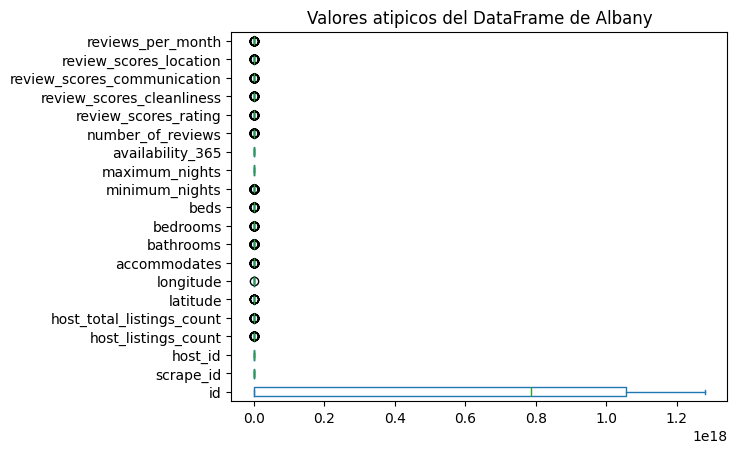

In [29]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize = (15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores atipicos del DataFrame de Albany")
plt.show() #dibujamos el diagrama

In [30]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           421 non-null    int64  
 1   scrape_id                    421 non-null    int64  
 2   host_id                      421 non-null    int64  
 3   host_listings_count          421 non-null    int64  
 4   host_total_listings_count    421 non-null    int64  
 5   latitude                     421 non-null    float64
 6   longitude                    421 non-null    float64
 7   accommodates                 421 non-null    int64  
 8   bathrooms                    421 non-null    float64
 9   bedrooms                     421 non-null    float64
 10  beds                         421 non-null    float64
 11  minimum_nights               421 non-null    int64  
 12  maximum_nights               421 non-null    int64  
 13  availability_365    

**_PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME_**

In [31]:
#Método aplicando desviación estándar. Encuentro los valores extremos
y = cuantitativas
Limite_Superior =y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido id                             2.092318e+18
scrape_id                      2.024111e+13
host_id                        7.832370e+08
host_listings_count            4.051366e+02
host_total_listings_count      8.012474e+02
latitude                       4.268669e+01
longitude                     -7.372032e+01
accommodates                   1.105706e+01
bathrooms                      2.930045e+00
bedrooms                       4.929650e+00
beds                           5.144923e+00
minimum_nights                 6.694384e+01
maximum_nights                 1.716226e+03
availability_365               5.977454e+02
number_of_reviews              3.818826e+02
review_scores_rating           5.684305e+00
review_scores_cleanliness      5.614814e+00
review_scores_communication    5.520490e+00
review_scores_location         5.722602e+00
reviews_per_month              8.164886e+00
dtype: float64
Limite inferior permitido id                            -8.186369e+17
scrape_id

In [32]:
#Obtenemos datos y outliers se convierten en nulos en el DataFrame
data3=cuantitativas[(y<=Limite_Superior) &(y>=Limite_Inferior)]
data3

id       scrape_id    host_id  host_listings_count  \
0                2992450  20241105062440    4621559                  1.0   
1                3820211  20241105062440   19648678                  4.0   
2                5651579  20241105062440   29288920                  2.0   
3                6623339  20241105062440   19648678                  4.0   
4                9005989  20241105062440   17766924                  1.0   
..                   ...             ...        ...                  ...   
416  1277527400878120655  20241105062440  382970529                 14.0   
417  1277717926531215616  20241105062440      65760                  1.0   
418  1279011643102137684  20241105062440  539608284                 13.0   
419  1279781671588026640  20241105062440  528617680                  1.0   
420  1279846646046615122  20241105062440   32379616                  4.0   

     host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                          5.0  42.657890 -73.753700           4.0        1.0   
1                          7.0  42.652220 -73.767240           2.0        1.0   
2                          2.0  42.646150 -73.759660           2.0        1.0   
3                          7.0  42.652220 -73.767240           2.0        1.0   
4                          1.0  42.655590 -73.765060           4.0        1.0   
..                         ...        ...        ...           ...        ...   
416                       23.0  42.654727 -73.761783           8.0        2.0   
417                        1.0  42.649762 -73.764529           6.0        2.5   
418                       15.0  42.661396 -73.762047           1.0        1.0   
419                        2.0  42.645311 -73.757934           1.0        1.5   
420                        8.0  42.664093 -73.767952           1.0        0.5   

     bedrooms  beds  minimum_nights  maximum_nights  availability_365  \
0         2.0   2.0            28.0            1125               219   
1         1.0   1.0             2.0            1125               363   
2         0.0   1.0             2.0              45                21   
3         1.0   1.0             2.0            1125               339   
4         1.0   2.0             1.0            1125               357   
..        ...   ...             ...             ...               ...   
416       2.0   4.0             2.0             365               365   
417       3.0   3.0             7.0            1125               363   
418       1.0   1.0             4.0             365               365   
419       2.0   1.0             1.0             365               365   
420       1.0   1.0            28.0             365               341   

     number_of_reviews  review_scores_rating  review_scores_cleanliness  \
0                  9.0                   NaN                        NaN   
1                306.0                  4.75                       4.87   
2                370.0                  4.51                       4.45   
3                328.0                  4.73                       4.71   
4                  NaN                  4.79                       4.83   
..                 ...                   ...                        ...   
416                0.0                  4.90                       4.90   
417                0.0                  4.90                       4.90   
418                0.0                  4.90                       4.90   
419                1.0                  4.00                       4.00   
420                0.0                  4.90                       4.90   

     review_scores_communication  review_scores_location  reviews_per_month  
0                           4.56                     NaN               0.07  
1                           4.81                    4.82               2.46  
2                           4.87                    4.76               3.20  
3                           4.70              

In [33]:
#Corroboramos valores nulos del dataframe
valores_nulos=data3.isnull().sum()
valores_nulos

id                              0
scrape_id                       0
host_id                         0
host_listings_count             5
host_total_listings_count       5
latitude                        2
longitude                       1
accommodates                   10
bathrooms                      12
bedrooms                       11
beds                            5
minimum_nights                  2
maximum_nights                  0
availability_365                0
number_of_reviews              11
review_scores_rating            8
review_scores_cleanliness       9
review_scores_communication    11
review_scores_location          9
reviews_per_month               7
dtype: int64

In [34]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(), 1))
data_clean

id       scrape_id    host_id  host_listings_count  \
0                2992450  20241105062440    4621559                  1.0   
1                3820211  20241105062440   19648678                  4.0   
2                5651579  20241105062440   29288920                  2.0   
3                6623339  20241105062440   19648678                  4.0   
4                9005989  20241105062440   17766924                  1.0   
..                   ...             ...        ...                  ...   
416  1277527400878120655  20241105062440  382970529                 14.0   
417  1277717926531215616  20241105062440      65760                  1.0   
418  1279011643102137684  20241105062440  539608284                 13.0   
419  1279781671588026640  20241105062440  528617680                  1.0   
420  1279846646046615122  20241105062440   32379616                  4.0   

     host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                          5.0  42.657890 -73.753700           4.0        1.0   
1                          7.0  42.652220 -73.767240           2.0        1.0   
2                          2.0  42.646150 -73.759660           2.0        1.0   
3                          7.0  42.652220 -73.767240           2.0        1.0   
4                          1.0  42.655590 -73.765060           4.0        1.0   
..                         ...        ...        ...           ...        ...   
416                       23.0  42.654727 -73.761783           8.0        2.0   
417                        1.0  42.649762 -73.764529           6.0        2.5   
418                       15.0  42.661396 -73.762047           1.0        1.0   
419                        2.0  42.645311 -73.757934           1.0        1.5   
420                        8.0  42.664093 -73.767952           1.0        0.5   

     bedrooms  beds  minimum_nights  maximum_nights  availability_365  \
0         2.0   2.0            28.0            1125               219   
1         1.0   1.0             2.0            1125               363   
2         0.0   1.0             2.0              45                21   
3         1.0   1.0             2.0            1125               339   
4         1.0   2.0             1.0            1125               357   
..        ...   ...             ...             ...               ...   
416       2.0   4.0             2.0             365               365   
417       3.0   3.0             7.0            1125               363   
418       1.0   1.0             4.0             365               365   
419       2.0   1.0             1.0             365               365   
420       1.0   1.0            28.0             365               341   

     number_of_reviews  review_scores_rating  review_scores_cleanliness  \
0                  9.0                  4.80                       4.80   
1                306.0                  4.75                       4.87   
2                370.0                  4.51                       4.45   
3                328.0                  4.73                       4.71   
4                 47.1                  4.79                       4.83   
..                 ...                   ...                        ...   
416                0.0                  4.90                       4.90   
417                0.0                  4.90                       4.90   
418                0.0                  4.90                       4.90   
419                1.0                  4.00                       4.00   
420                0.0                  4.90                       4.90   

     review_scores_communication  review_scores_location  reviews_per_month  
0                           4.56                    4.70               0.07  
1                           4.81                    4.82               2.46  
2                           4.87                    4.76               3.20  
3                           4.70              

In [35]:
#Corroboramos valores nulos del dataframe
valores_nulos=data_clean.isnull().sum()
valores_nulos

id                             0
scrape_id                      0
host_id                        0
host_listings_count            0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
reviews_per_month              0
dtype: int64

**_PROCEDMIENTO DE "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME_**

In [36]:
#Método aplicando CUARTILES. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                             2.641174e+18
scrape_id                      2.024111e+13
host_id                        8.859874e+08
host_listings_count            1.950000e+01
host_total_listings_count      2.950000e+01
latitude                       4.267879e+01
longitude                     -7.372418e+01
accommodates                   7.000000e+00
bathrooms                      1.000000e+00
bedrooms                       3.500000e+00
beds                           3.500000e+00
minimum_nights                 6.000000e+00
maximum_nights                 2.265000e+03
availability_365               7.365000e+02
number_of_reviews              1.615000e+02
review_scores_rating           5.305000e+00
review_scores_cleanliness      5.275000e+00
review_scores_communication    5.195000e+00
review_scores_location         5.440000e+00
reviews_per_month              6.445000e+00
dtype: float64
Limite inferior permitido id                            -1.584704e+18
scrape_id

In [37]:
#Obtenemos datos limpios del DtaFrame
#Obtenemos datos y outliers se convierten en nulos en el DataFrame
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr) &(y>=Limite_Inferior_iqr)]
data3_iqr

id       scrape_id    host_id  host_listings_count  \
0                2992450  20241105062440    4621559                  1.0   
1                3820211  20241105062440   19648678                  4.0   
2                5651579  20241105062440   29288920                  2.0   
3                6623339  20241105062440   19648678                  4.0   
4                9005989  20241105062440   17766924                  1.0   
..                   ...             ...        ...                  ...   
416  1277527400878120655  20241105062440  382970529                 14.0   
417  1277717926531215616  20241105062440      65760                  1.0   
418  1279011643102137684  20241105062440  539608284                 13.0   
419  1279781671588026640  20241105062440  528617680                  1.0   
420  1279846646046615122  20241105062440   32379616                  4.0   

     host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                          5.0  42.657890 -73.753700           4.0        1.0   
1                          7.0  42.652220 -73.767240           2.0        1.0   
2                          2.0  42.646150 -73.759660           2.0        1.0   
3                          7.0  42.652220 -73.767240           2.0        1.0   
4                          1.0  42.655590 -73.765060           4.0        1.0   
..                         ...        ...        ...           ...        ...   
416                       23.0  42.654727 -73.761783           NaN        NaN   
417                        1.0  42.649762 -73.764529           6.0        NaN   
418                       15.0  42.661396 -73.762047           1.0        1.0   
419                        2.0  42.645311 -73.757934           1.0        NaN   
420                        8.0  42.664093 -73.767952           1.0        NaN   

     bedrooms  beds  minimum_nights  maximum_nights  availability_365  \
0         2.0   2.0             NaN            1125               219   
1         1.0   1.0             2.0            1125               363   
2         0.0   1.0             2.0              45                21   
3         1.0   1.0             2.0            1125               339   
4         1.0   2.0             1.0            1125               357   
..        ...   ...             ...             ...               ...   
416       2.0   NaN             2.0             365               365   
417       3.0   3.0             NaN            1125               363   
418       1.0   1.0             4.0             365               365   
419       2.0   1.0             1.0             365               365   
420       1.0   1.0             NaN             365               341   

     number_of_reviews  review_scores_rating  review_scores_cleanliness  \
0                  9.0                   NaN                        NaN   
1                  NaN                  4.75                       4.87   
2                  NaN                  4.51                       4.45   
3                  NaN                  4.73                       4.71   
4                  NaN                  4.79                       4.83   
..                 ...                   ...                        ...   
416                0.0                  4.90                       4.90   
417                0.0                  4.90                       4.90   
418                0.0                  4.90                       4.90   
419                1.0                   NaN                        NaN   
420                0.0                  4.90                       4.90   

     review_scores_communication  review_scores_location  reviews_per_month  
0                            NaN                     NaN               0.07  
1                           4.81                    4.82               2.46  
2                           4.87                    4.76               3.20  
3                           4.70              

In [38]:
#Corroboramos valores nulos del dataframe
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

id                              0
scrape_id                       0
host_id                         0
host_listings_count            28
host_total_listings_count      28
latitude                        9
longitude                       1
accommodates                   27
bathrooms                      86
bedrooms                       27
beds                           30
minimum_nights                 75
maximum_nights                  0
availability_365                0
number_of_reviews              44
review_scores_rating           29
review_scores_cleanliness      28
review_scores_communication    33
review_scores_location         30
reviews_per_month              21
dtype: int64

In [39]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(), 1))
data4_iqr

id       scrape_id    host_id  host_listings_count  \
0                2992450  20241105062440    4621559                  1.0   
1                3820211  20241105062440   19648678                  4.0   
2                5651579  20241105062440   29288920                  2.0   
3                6623339  20241105062440   19648678                  4.0   
4                9005989  20241105062440   17766924                  1.0   
..                   ...             ...        ...                  ...   
416  1277527400878120655  20241105062440  382970529                 14.0   
417  1277717926531215616  20241105062440      65760                  1.0   
418  1279011643102137684  20241105062440  539608284                 13.0   
419  1279781671588026640  20241105062440  528617680                  1.0   
420  1279846646046615122  20241105062440   32379616                  4.0   

     host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                          5.0  42.657890 -73.753700           4.0        1.0   
1                          7.0  42.652220 -73.767240           2.0        1.0   
2                          2.0  42.646150 -73.759660           2.0        1.0   
3                          7.0  42.652220 -73.767240           2.0        1.0   
4                          1.0  42.655590 -73.765060           4.0        1.0   
..                         ...        ...        ...           ...        ...   
416                       23.0  42.654727 -73.761783           3.0        1.0   
417                        1.0  42.649762 -73.764529           6.0        1.0   
418                       15.0  42.661396 -73.762047           1.0        1.0   
419                        2.0  42.645311 -73.757934           1.0        1.0   
420                        8.0  42.664093 -73.767952           1.0        1.0   

     bedrooms  beds  minimum_nights  maximum_nights  availability_365  \
0         2.0   2.0             1.7            1125               219   
1         1.0   1.0             2.0            1125               363   
2         0.0   1.0             2.0              45                21   
3         1.0   1.0             2.0            1125               339   
4         1.0   2.0             1.0            1125               357   
..        ...   ...             ...             ...               ...   
416       2.0   1.4             2.0             365               365   
417       3.0   3.0             1.7            1125               363   
418       1.0   1.0             4.0             365               365   
419       2.0   1.0             1.0             365               365   
420       1.0   1.0             1.7             365               341   

     number_of_reviews  review_scores_rating  review_scores_cleanliness  \
0                  9.0                  4.90                       4.90   
1                 30.6                  4.75                       4.87   
2                 30.6                  4.51                       4.45   
3                 30.6                  4.73                       4.71   
4                 30.6                  4.79                       4.83   
..                 ...                   ...                        ...   
416                0.0                  4.90                       4.90   
417                0.0                  4.90                       4.90   
418                0.0                  4.90                       4.90   
419                1.0                  4.90                       4.90   
420                0.0                  4.90                       4.90   

     review_scores_communication  review_scores_location  reviews_per_month  
0                           4.90                    4.80               0.07  
1                           4.81                    4.82               2.46  
2                           4.87                    4.76               3.20  
3                           4.70              

In [40]:
#Unimos el dataframe cuantitativas limpio con el dataframe cualitativas
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

listing_url last_scraped  \
0                https://www.airbnb.com/rooms/2992450   2024-11-05   
1                https://www.airbnb.com/rooms/3820211   2024-11-05   
2                https://www.airbnb.com/rooms/5651579   2024-11-05   
3                https://www.airbnb.com/rooms/6623339   2024-11-05   
4                https://www.airbnb.com/rooms/9005989   2024-11-05   
..                                                ...          ...   
416  https://www.airbnb.com/rooms/1277527400878120655   2024-11-05   
417  https://www.airbnb.com/rooms/1277717926531215616   2024-11-05   
418  https://www.airbnb.com/rooms/1279011643102137684   2024-11-05   
419  https://www.airbnb.com/rooms/1279781671588026640   2024-11-05   
420  https://www.airbnb.com/rooms/1279846646046615122   2024-11-05   

              source                                              name  \
0        city scrape                        Luxury 2 bedroom apartment   
1    previous scrape         Restored Precinct in Center Sq. w/Parking   
2        city scrape        Large studio apt  by Capital Center & ESP@   
3        city scrape  Center Sq. Loft in Converted Precinct w/ Parking   
4        city scrape    Studio in The heart of Center SQ, in Albany NY   
..               ...                                               ...   
416      city scrape         Experience Historic Albany Full Throttle!   
417      city scrape                   Large Center Sq Luxury Retreat.   
418      city scrape                                   nice cool stays   
419      city scrape                       Spacious & Quiet Townhouse.   
420      city scrape                  Cozy room in the heart of Albany   

                                 neighborhood_overview  \
0                                                 nice   
1    Great restaurants, architecture, walking, peop...   
2    The neighborhood is very eclectic. We have a v...   
3    Located in Albany's finest urban neighborhood,...   
4    There are many shops, restaurants, bars, museu...   
..                                                 ...   
416                                               nice   
417                                               nice   
418                                               nice   
419                                               nice   
420                                               nice   

                                           picture_url  \
0    https://a0.muscache.com/pictures/44627226/0e72...   
1    https://a0.muscache.com/pictures/prohost-api/H...   
2    https://a0.muscache.com/pictures/b3fc42f3-6e5e...   
3    https://a0.muscache.com/pictures/prohost-api/H...   
4    https://a0.muscache.com/pictures/d242a77e-437c...   
..                                                 ...   
416  https://a0.muscache.com/pictures/hosting/Hosti...   
417  https://a0.muscache.com/pictures/miso/Hosting-...   
418  https://a0.muscache.com/pictures/hosting/Hosti...   
419  https://a0.muscache.com/pictures/hosting/Hosti...   
420  https://a0.muscache.com/pictures/hosting/Hosti...   

                                        host_url   host_name  host_since  \
0      https://www.airbnb.com/users/show/4621559     Kenneth  2013-01-07   
1     https://www.airbnb.com/users/show/19648678       Terra  2014-08-07   
2     https://www.airbnb.com/users/show/29288920       Gregg  2015-03-13   
3     https://www.airbnb.com/users/show/19648678       Terra  2014-08-07   
4     https://www.airbnb.com/users/show/17766924       Sugey  2014-07-07   
..                                           ...         ...         ...   
416  https://www.airbnb.com/users/show/382970529      Thomas  2021-01-04   
417      https://www.airbnb.com/users/show/65760     Anthony  2009-12-26   
418  https://www.airbnb.com/users/show/539608284  Joyhefsiba  2023-09-29   
419  https://www.airbnb.com/users/show/528617680       Paola  2023-07-29   
420   https://www.airbnb.com/users/show/32379616     Fabiola  2015-05-01   

     

In [44]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

listing_url                    0
last_scraped                   0
source                         0
name                           0
neighborhood_overview          0
picture_url                    0
host_url                       0
host_name                      0
host_since                     0
host_location                  0
host_about                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_picture_url               0
host_neighbourhood             0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
bathrooms_text                 0
amenities                      0
price                          0
calendar_updated               0
has_availability               0
instant_bookable               0
id        

In [45]:
valores_nulos=Datos_limpios.isnull().sum().sum()
valores_nulos

np.int64(0)

In [42]:
#Convertir DtaFrame a csv
Datos_limpios.to_csv("Datos_limpios_Albany.csv")
